## Classification Models with Keras ##

In this explain and build a classification model to solve problems with Keras. We will use the popular MNIST dataset for a change

"The MNIST database, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning."

Also, this way, will get to compare how conventional nural networks compare to convolutional neural networks, that we will build in the next step.

the objetives for this notebook are:
  1. Use an image database (MNIST) for training various image preprocessing systems
  2. Build a Neural Network.
  3. Train and Tes the Network to make image classification.

Let's start by importing Keras and some of its modules.

In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
print("setup complete")

setup complete


The Keras library conveniently includes the MNIST dataset as part of its API.


In [16]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Acording to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.

In [17]:
X_train.shape

(60000, 28, 28)

In [18]:
X_test.shape

(10000, 28, 28)

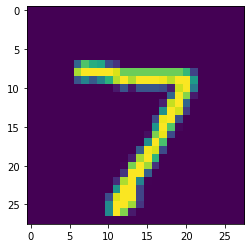

In [20]:
plt.imshow(X_test[0])

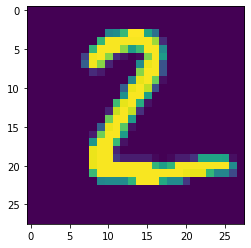

In [21]:
plt.imshow(X_test[1])

We need to flatten the images into one-dimentional vectors, eachs of size (28 x 28) =784 (only for conventional neural networks)

In [22]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


Acording to documentation, pixel values can range from 0 to 255, let's normalize the vectors to be between 0 an 1.

In [23]:
X_train = X_train / 255
X_test = X_test / 255

For classification we need to divide our target variable into categories. We use the to_categorical function from Keras Utilities package (also you can use the OH encoder from Sklearn preprocessing package).

In [24]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


As we see in the 'Keras-regression-model', a model in keras can be build as any other model in scikit-learn package. 
In this case, we don't have just one neuron for the output layer.

In [9]:
def classification_model():
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train and Test the Network ##

In [10]:
model = classification_model() #build a model
# and fit the model like always
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
# we need to evaluate the model
scores = model.evaluate(X_test, y_test, verbose =0)

Epoch 1/10
1875/1875 - 21s - loss: 0.1874 - accuracy: 0.9425 - val_loss: 0.1105 - val_accuracy: 0.9656
Epoch 2/10
1875/1875 - 13s - loss: 0.0795 - accuracy: 0.9751 - val_loss: 0.0861 - val_accuracy: 0.9722
Epoch 3/10
1875/1875 - 11s - loss: 0.0527 - accuracy: 0.9828 - val_loss: 0.0800 - val_accuracy: 0.9767
Epoch 4/10
1875/1875 - 10s - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0753 - val_accuracy: 0.9778
Epoch 5/10
1875/1875 - 11s - loss: 0.0334 - accuracy: 0.9890 - val_loss: 0.0733 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 - 11s - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0852 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 - 11s - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0830 - val_accuracy: 0.9799
Epoch 8/10
1875/1875 - 11s - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0832 - val_accuracy: 0.9816
Epoch 9/10
1875/1875 - 13s - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0989 - val_accuracy: 0.9785
Epoch 10/10
1875/1875 - 16s - loss: 0.0146 - accuracy: 0.9951 - val_loss:

In [11]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))    

Accuracy: 0.9799000024795532% 
 Error: 0.020099997520446777


In [12]:
predictions = model.predict(X_test)
print("predictions shape:", predictions.shape)

predictions shape: (10000, 10)


In [26]:
predictions[0, 7]

1.0

In [27]:
predictions[1, 2]

1.0

As we see in the printed images above.